# Домашнее задание

Работаем с датасетом про дорожные знаки.

https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed/data

В первых двух задачах берем только файл train.pickle и можно подгрузить labels_names.csv

Данные можно прочитать через `pd.read_pickle`

## Easy

Скачать датасет, обучить логистическую регрессию, измерить качество.

Текстом кратко обосновать какую метрику выбираем и почему такую.

Какой вид дорожных знаков модель путает чаще всего?

## Medium

Обучить и сравнить между собой:

- логистическая регрессия
- kNN
- НБК
- SVM (попробовать 3 разных ядра)

Какая модель отработала лучше, а какая хуже всех?

Проинтерпретируйте почему худшая модель именно эта.

## Hard

Вы - ML-инженер в команде беспилотных автомобилей! Ваша следующая цель - сделать алгоритм, который будет распознавать дорожные знаки. Другая команда уже позаботилась о подготовке данных - вам приходят обрезанные картинки 32х32. Но есть проблема - разметка стоит денег, у проекта есть бюджетные ограничения, но вам готовы выделить тот бюджет, который вы сможете обосновать.

Определите сколько и каких семплов данных необходимо для того, чтобы обучить достаточно хороший алгоритм.

**Подсказка:** При анализе изображений обычно делают специальную предобработку - картинки крутят-вертят, по-разному меняют цвета. Рядом с данными лежит питоновский скрипт, может быть он поможет уменьшить необходимое количество семплов?

# Easy

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns

In [2]:
data = pd.read_pickle('train.pickle')
data

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [3]:
data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [4]:
data['features'].shape

(34799, 32, 32, 3)

In [5]:
data['labels'].shape

(34799,)

In [6]:
df = pd.DataFrame(data['features'].reshape(len(data['features']), -1))

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,28,25,24,27,24,23,27,24,22,27,...,22,27,24,22,27,23,21,26,22,20
1,28,24,24,26,23,23,27,24,24,28,...,22,27,23,22,27,24,23,29,26,25
2,29,25,25,29,26,26,30,27,27,30,...,22,29,25,23,28,24,22,30,26,24
3,31,28,26,29,26,24,30,27,26,29,...,22,28,23,22,27,23,22,27,23,21
4,33,27,25,31,25,24,32,26,25,31,...,21,25,22,20,26,22,19,27,22,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34794,22,25,33,34,31,35,46,51,54,24,...,46,23,22,26,40,41,44,25,29,34
34795,22,31,47,32,32,33,35,35,38,39,...,37,27,31,33,32,31,35,44,46,50
34796,51,67,86,55,59,71,75,81,92,46,...,36,67,63,76,39,45,55,32,37,47
34797,82,78,96,120,126,148,112,125,146,65,...,53,32,34,41,45,42,48,41,43,52


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df, data['labels'], train_size=0.2, random_state=42)

In [9]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
6146,65,62,54,66,63,56,66,63,57,67,...,20,20,21,21,20,22,21,21,22,21
29728,255,255,255,255,255,255,255,255,255,255,...,239,215,213,218,234,232,230,255,255,255
9775,23,20,18,25,21,19,24,20,18,22,...,19,25,21,19,24,19,18,22,19,18
17796,13,13,18,13,13,17,12,12,17,12,...,19,16,16,21,17,17,23,17,17,22
28250,255,255,255,255,255,255,255,255,255,255,...,145,234,238,219,255,255,252,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,139,157,188,138,157,190,139,156,190,139,...,65,45,52,63,39,45,54,42,46,50
6265,198,205,221,196,204,221,194,203,216,193,...,60,43,47,41,33,38,42,40,42,44
11284,16,15,18,14,14,17,14,14,17,14,...,19,14,12,15,11,11,14,11,11,15
860,60,45,34,73,68,68,102,97,89,83,...,31,39,34,28,31,26,22,41,35,30


In [10]:
clf = LogisticRegression(n_jobs=-1, max_iter=1000, random_state=42)

In [11]:
clf.fit(X_train, y_train)

/Users/vambassa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

In [12]:
predictions = clf.predict(X_test)

In [13]:
# Сначала посчитаем accuracy
accuracy_score(predictions, y_test)

0.8973419540229886

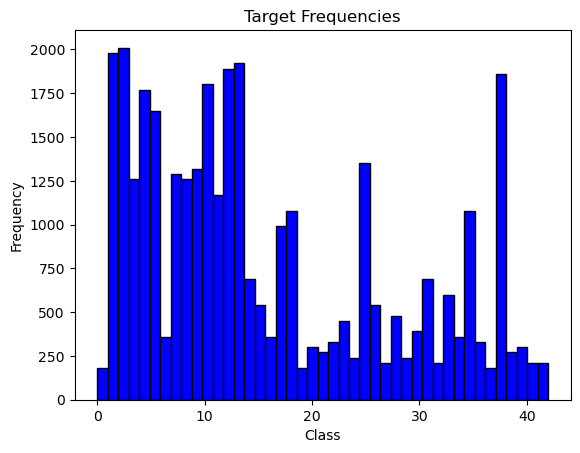

In [14]:
# Дальше заметим, что у нас изначально дисбаланс классов,
# поэтому в качестве метрики будем использовать macro_precision и macro_recall
plt.hist(data['labels'], bins=len(set(data['labels'])), color='blue', edgecolor='black')
plt.title('Target Frequencies')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [15]:
recall_score(predictions,  y_test, average='macro')

0.8932139610521037

In [16]:
precision_score(predictions, y_test, average='macro')

0.8744129003749972

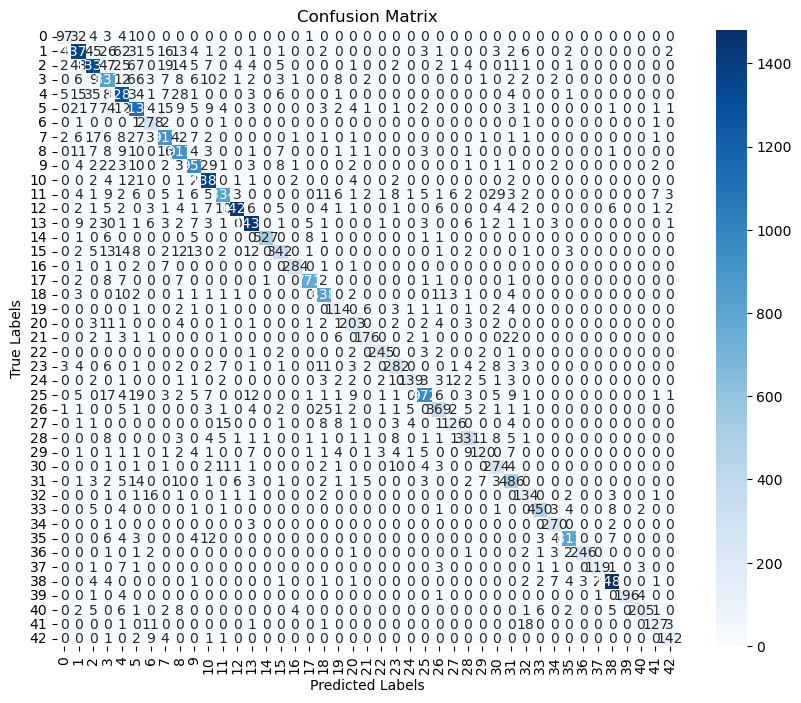

In [17]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [18]:
err_per_class = cm.sum(axis=1) - np.diag(cm)

print('Most confused classes (top 5): ', np.argsort(err_per_class)[::-1][:5])

Most confused classes (top 5):  [2 1 5 3 4]


In [19]:
# Посмотрим, что это за классы вообще
labels = pd.read_csv('label_names.csv')
labels
# Видим, что модель в основном путает скоростной режим (двузначные числа)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


#  Medium

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [21]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh_predictions = neigh.predict(X_test)
print('precision: ', precision_score(y_test, neigh_predictions, average='macro'))
print('recall: ', recall_score(y_test, neigh_predictions, average='macro'))

/Users/vambassa/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


precision:  0.7179518308874732
recall:  0.6491331064697


In [22]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)
svc_linear_predictions = svc_linear.predict(X_test)
print('precision: ', precision_score(y_test, svc_linear_predictions, average='macro'))
print('recall: ', recall_score(y_test, svc_linear_predictions, average='macro'))

precision:  0.8820664408187718
recall:  0.8879311985851974


In [23]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)
svc_poly_predictions = svc_poly.predict(X_test)
print('precision: ', precision_score(y_test, svc_poly_predictions, average='macro'))
print('recall: ', recall_score(y_test, svc_poly_predictions, average='macro'))

precision:  0.7990453108363533
recall:  0.5603064299250441


In [24]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
svc_rbf_predictions = svc_rbf.predict(X_test)
print('precision: ', precision_score(y_test, svc_rbf_predictions, average='macro'))
print('recall: ', recall_score(y_test, svc_rbf_predictions, average='macro'))

precision:  0.8350917966166912
recall:  0.6196789239789102


In [25]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes.predict(X_test)
print('precision: ', precision_score(y_test, naive_bayes_predictions, average='macro'))
print('recall: ', recall_score(y_test, naive_bayes_predictions, average='macro'))

precision:  0.4084025721608965
recall:  0.3426248241479547


In [26]:
# Лучше всех справились логистическая регрессия и SVM с kernel=linear.
# Это может указывать на то, что в данных преобладают линейные зависимости между признаками и целевой переменной.
# Разделяющая граница между классами может быть линейной, то есть классы линейно разделимы.

# Хуже всех справился Байес, возможно, из-за допущения, что признаки независимы